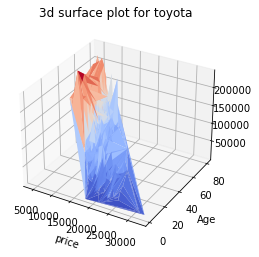

In [10]:
#1a -> 3d Surface Plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('Toyoto.csv')
x = df['Price']
y = df['Age']
z = df['KM']

ax = plt.axes(projection = '3d')
ax.plot_trisurf(x,y,z,cmap = 'coolwarm')
ax.set_title('3d surface plot for toyota')
ax.set_xlabel('price')
ax.set_ylabel('Age')

plt.show()

In [313]:
#1b -> best first search
import heapq
def bfs(graph,start,goal):
    priority_queue = []
    heapq.heappush(priority_queue,(start))
    visited = set()
    parent = {start : None}
    cost = {start : 0}
    
    while priority_queue:
        current_node = heapq.heappop(priority_queue)
        
        if current_node in visited:
            continue
        visited.add(current_node)
        
        if current_node == goal:
            print("goal reached")
        
        for neighbor,edge_cost in graph[current_node]:
            if neighbor not in visited:
                heapq.heappush(priority_queue,(neighbor))
                parent[neighbor] = current_node
                cost[neighbor] = edge_cost + cost[current_node]
    path = []
    node = goal
    while node is not None:
        path.append(node)
        node = parent[node]
    path.reverse()
    return path,cost[goal]

graph = {
    'A': [('B', 1), ('C', 2)],
    'B': [('D', 3), ('E', 4)],
    'C': [('F', 5), ('G', 6)],
    'D': [],
    'E': [],
    'F': [],
    'G': []
}
start = 'A'
goal = 'D'

path,cost = bfs(graph,start,goal)
print("path of bfs is :",path)
print("cost of bfs is :",cost)


goal reached
path of bfs is : ['A', 'B', 'D']
cost of bfs is : 4


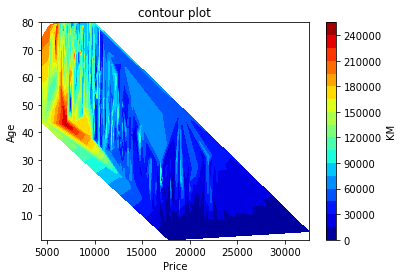

In [18]:
#2a -> contour plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('Toyoto.csv')
x = df['Price']
y = df['Age']
z = df['KM']

plt.tricontourf(x,y,z,levels = 20,cmap = 'jet')
plt.xlabel('Price')
plt.ylabel('Age')
plt.colorbar(label = 'KM')
plt.title('contour plot')
plt.show()

In [311]:
#2b -> A star algorithm
import heapq
def astar(graph,start,goal,heuristic):
    priority_queue = []
    heapq.heappush(priority_queue,(start,heuristic[start])) 
    visited = set()
    parent = {start:None}
    g_cost = {start : 0}
    
    while priority_queue:
        current_node,_ = heapq.heappop(priority_queue)
        
        if current_node in visited:
            continue
        visited.add(current_node)
        
        if current_node is goal:
            print("goal reached")
            
        for neighbor,edge_cost in graph[current_node]:
            new_cost = g_cost[current_node] + edge_cost
            if neighbor not in g_cost or new_cost < g_cost[neighbor]:
                g_cost[neighbor] = new_cost
                f_cost = new_cost + heuristic[neighbor]
                heapq.heappush(priority_queue,(neighbor,f_cost))
                parent[neighbor] = current_node
                
    path = []
    node = goal
    while node is not None:
        path.append(node)
        node = parent[node]
    path.reverse()
    return path,g_cost.get(goal,0)


graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': [],
    'E': [],
    'F': [],
    'G': []
}

# Example heuristic values
heuristic = {
    'A': 6,
    'B': 4,
    'C': 4,
    'D': 0,
    'E': 2,
    'F': 3,
    'G': 1

}
start = 'A'
goal = 'D'

path,cost = astar(graph,start,goal,heuristic)
print(f"Astar patth is {path}")
print(f"Total cost is {cost}")



ValueError: not enough values to unpack (expected 2, got 1)

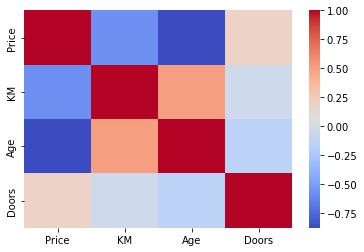

In [24]:
#3a -> heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('Toyoto.csv')

sns.heatmap(df[['Price',"KM","Age","Doors"]].corr(),cmap = 'coolwarm')
plt.show()

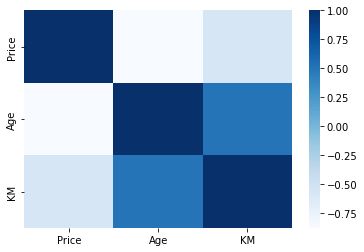

In [26]:
#3a heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('Toyoto.csv')
x = df['Price']
y = df['Age']
z = df['KM']

sns.heatmap(df[['Price','Age','KM']].corr(),cmap = 'Blues')
plt.show()

In [30]:
#3b -> MinMax algorithm
def minimax(depth,node_index,maximizing_agent,values,path):
    if depth == 3:
        return values[node_index],path + [node_index]
    if maximizing_agent:
        best = float("-inf")
        best_path=[]
        for i in range(2):
            value,new_path = minimax(depth+1,node_index*2+1,False,values,path+[node_index])
            if value > best:
                best = value
                best_path = new_path
            return best,best_path
    else:
        best = float("inf")
        best_path=[]
        for i in range(2):
            value,new_path = minimax(depth+1,node_index*2+1,True,values,path+[node_index])
            if value < best:
                best = value
                best_path = new_path
            return best,best_path
values = [2,5,6,1,5,7,8,12,25]

optimal_value,optimal_path = minimax(0,0,True,values,[])
print(f"optimal value is {optimal_value}")
print(f"optimal path is {optimal_path}")

optimal value is 12
optimal path is [0, 1, 3, 7]


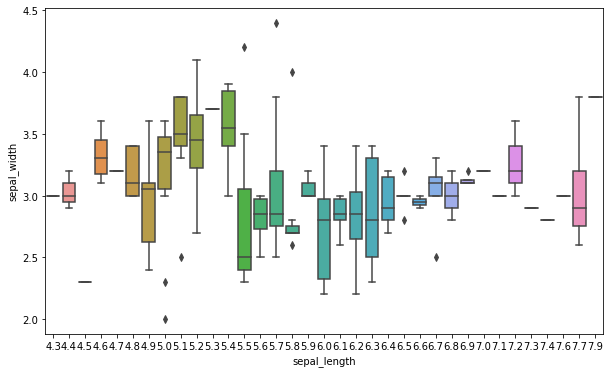

In [31]:
#4a -> Box Plot

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

dataset= sns.load_dataset('iris')
plt.figure(figsize=(10,6))
sns.boxplot(x=dataset['sepal_length'],y=dataset['sepal_width'])
plt.show()

In [32]:
#4b -> alpha-beta pruning
def alphabeta(depth,node_index,maximizing_agent,values,alpha,beta,path):
    if depth==3:
        return values[node_index],path+[node_index]
    
    if maximizing_agent:
        best = float("-inf")
        best_path=[]
        for i in range(2):
            value,new_path = alphabeta(depth+1,node_index*2+1,False,values,alpha,beta,path+[node_index])
            if value > best:
                best = value
                best_path = new_path
            alpha = max(alpha,value)
            if alpha>=beta:
                break
        return best,best_path
    else:
        best = float("inf")
        best_path=[]
        for i in range(2):
            value,new_path = alphabeta(depth+1,node_index*2+1,True,values,alpha,beta,path+[node_index])
            if value < best:
                best = value
                best_path = new_path
            beta = min(alpha,value)
            if alpha>=beta:
                break
        return best,best_path
    
values = [2,5,6,1,5,7,8,12,25]

optimal_value,optimal_path = alphabeta(0,0,True,values,float("-inf"),float("inf"),[])
print(f"optimal value is {optimal_value}")
print(f"optimal path is {optimal_path}")

optimal value is 12
optimal path is [0, 1, 3, 7]


In [105]:
#5 -> NaiveBayes classifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


In [106]:
df = pd.read_csv('titanic.csv')
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [107]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [109]:
df.shape

(891, 12)

In [110]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [111]:
df[['Survived','Pclass','Age','SibSp','Parch','Fare','Embarked']]

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S
887,1,1,19.0,0,0,30.0000,S
888,0,3,NaN,1,2,23.4500,S
889,1,1,26.0,0,0,30.0000,C


In [112]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
df = df[['Survived','Pclass','Age','SibSp','Parch','Fare','Embarked']]

In [114]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S


In [115]:
#handle missing values
imputer = SimpleImputer(strategy = 'median')
df[['Age','Fare']] = imputer.fit_transform(df[['Age','Fare']])

In [116]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [117]:
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

In [118]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

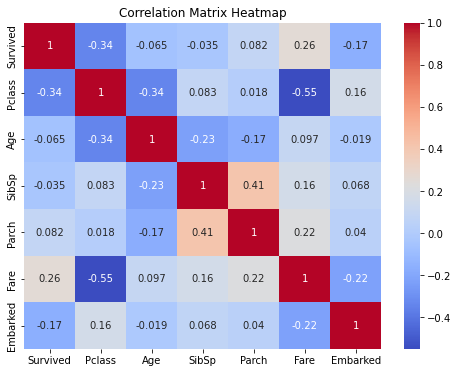

In [119]:
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [120]:
X = df.drop('Survived',axis = 1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)

In [121]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [122]:
y_pred = classifier.predict(X_test)

In [123]:
confusion =confusion_matrix(y_test,y_pred)
print(confusion)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
    

[[44  5]
 [19 22]]
0.7333333333333333


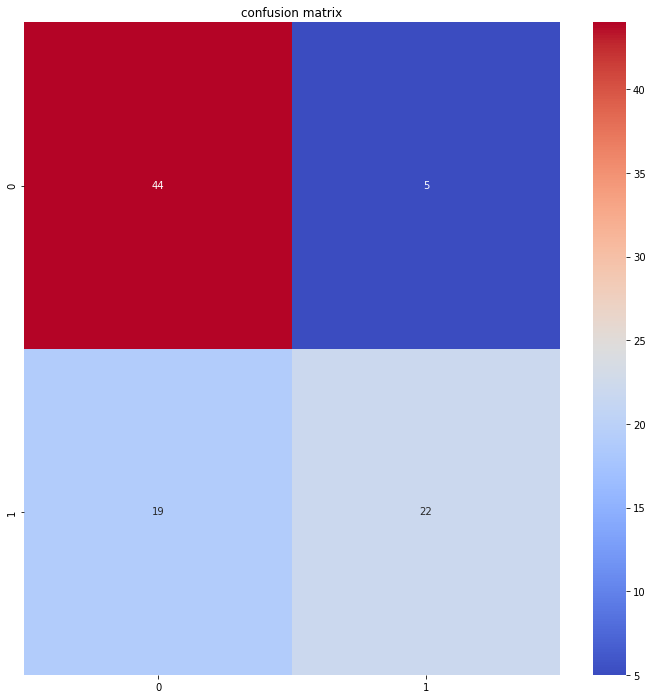

In [124]:
#plot correlation matrix
plt.figure(figsize=(12,12))
sns.heatmap(confusion,annot = True,cmap = 'coolwarm')
plt.title('confusion matrix')
plt.show()

In [125]:
#6 -> KNN classifier -> Glass Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [127]:
df = pd.read_csv('glass.csv')

In [128]:
print(df)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


In [129]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [130]:
df.shape

(214, 10)

In [131]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [132]:
df.dtypes


RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [133]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [134]:
imputer = SimpleImputer(strategy = 'median')
df[df.columns] = imputer.fit_transform(df[df.columns])

In [135]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Type', axis=1))

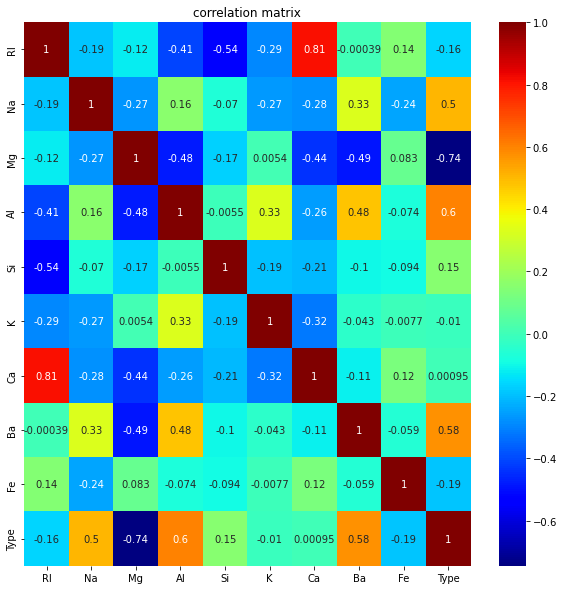

In [136]:
#plotting the correlation_matrix
plt.figure(figsize = (10,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot = True,cmap = 'jet')
plt.title('correlation matrix')
plt.show()

In [137]:
X = X_scaled
y = df['Type']

In [138]:
print(X)

[[ 0.87286765  0.28495326  1.25463857 ... -0.14576634 -0.35287683
  -0.5864509 ]
 [-0.24933347  0.59181718  0.63616803 ... -0.79373376 -0.35287683
  -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249 ... -0.82894938 -0.35287683
  -0.5864509 ]
 ...
 [ 0.75404635  1.16872135 -1.86551055 ... -0.36410319  2.95320036
  -0.5864509 ]
 [-0.61239854  1.19327046 -1.86551055 ... -0.33593069  2.81208731
  -0.5864509 ]
 [-0.41436305  1.00915211 -1.86551055 ... -0.23732695  3.01367739
  -0.5864509 ]]


In [139]:
print(y)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
209    7.0
210    7.0
211    7.0
212    7.0
213    7.0
Name: Type, Length: 214, dtype: float64


In [162]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 44)


In [163]:
def custom_euclidean(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))
def custom_manhattan(x1,x2):
    return np.sum(np.abs(x1-x2))



In [164]:
#intialize wrt K 
k = 3
clf_custom_euclidean = KNeighborsClassifier(n_neighbors = k,metric = custom_euclidean)
clf_custom_manhattan = KNeighborsClassifier(n_neighbors = k,metric = custom_manhattan)


In [165]:
clf_custom_euclidean.fit(X_train,y_train)
clf_custom_manhattan.fit(X_train,y_train)

KNeighborsClassifier(metric=<function custom_manhattan at 0x00000221440CE430>,
                     n_neighbors=3)

In [166]:
y_pred_euclidean = clf_custom_euclidean.predict(X_test)
y_pred_manhattan = clf_custom_manhattan.predict(X_test)


In [167]:
#calcilate accuracy 
accuracy_euclidean = accuracy_score(y_test,y_pred_euclidean)
accuracy_manhattan = accuracy_score(y_test,y_pred_manhattan)
print(accuracy_euclidean)
print(accuracy_manhattan)


0.6976744186046512
0.7209302325581395


In [169]:
confusion_euclidean = confusion_matrix(y_test,y_pred_euclidean)
confusion_manhattan = confusion_matrix(y_test,y_pred_manhattan)
print(confusion_euclidean)

print(confusion_manhattan)


[[15  4  1  0  0  0]
 [ 2  7  0  0  0  0]
 [ 3  1  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 0  1  0  0  0  5]]
[[15  4  1  0  0  0]
 [ 1  7  0  0  1  0]
 [ 3  1  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]


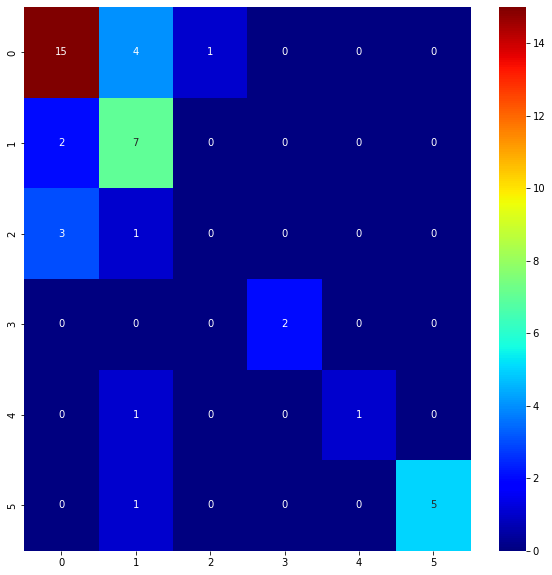

In [170]:
#correlation matrix heatmap
plt.figure(figsize = (10,10))
sns.heatmap(confusion_euclidean,annot = True,cmap = 'jet')
plt.show()

In [171]:
#7 -> decisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [173]:
df = pd.read_csv('weather.csv')


In [174]:
print(df)

     Outlook Temperature Humidity   Windy Play
0      Sunny         Hot     High    Weak   No
1      Sunny         Hot     High  Strong   No
2   Overcast         Hot     High    Weak  Yes
3       Rain        Mild     High    Weak  Yes
4       Rain        Cool   Normal    Weak  Yes
5       Rain        Cool   Normal  Strong   No
6   Overcast        Cool   Normal  Strong  Yes
7      Sunny        Mild     High    Weak   No
8      Sunny        Cool   Normal    Weak  Yes
9       Rain        Mild   Normal    Weak  Yes
10     Sunny        Mild   Normal  Strong  Yes
11  Overcast        Mild     High  Strong  Yes
12  Overcast         Hot   Normal    Weak  Yes
13      Rain        Mild     High  Strong   No


In [175]:
df.head()

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [176]:
df.describe()

,Outlook,Temperature,Humidity,Windy,Play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


In [177]:
df.dtypes


Outlook        object
Temperature    object
Humidity       object
Windy          object
Play           object
dtype: object

In [178]:
df.shape

(14, 5)

In [179]:
le = LabelEncoder()
for column in df.columns:
    df[column]=le.fit_transform(df[column])
    

In [180]:
print(df)

    Outlook  Temperature  Humidity  Windy  Play
0         2            1         0      1     0
1         2            1         0      0     0
2         0            1         0      1     1
3         1            2         0      1     1
4         1            0         1      1     1
5         1            0         1      0     0
6         0            0         1      0     1
7         2            2         0      1     0
8         2            0         1      1     1
9         1            2         1      1     1
10        2            2         1      0     1
11        0            2         0      0     1
12        0            1         1      1     1
13        1            2         0      0     0


In [181]:
y = df['Play']

In [183]:
X = df.drop('Play',axis = 1)

<Figure size 720x864 with 0 Axes>

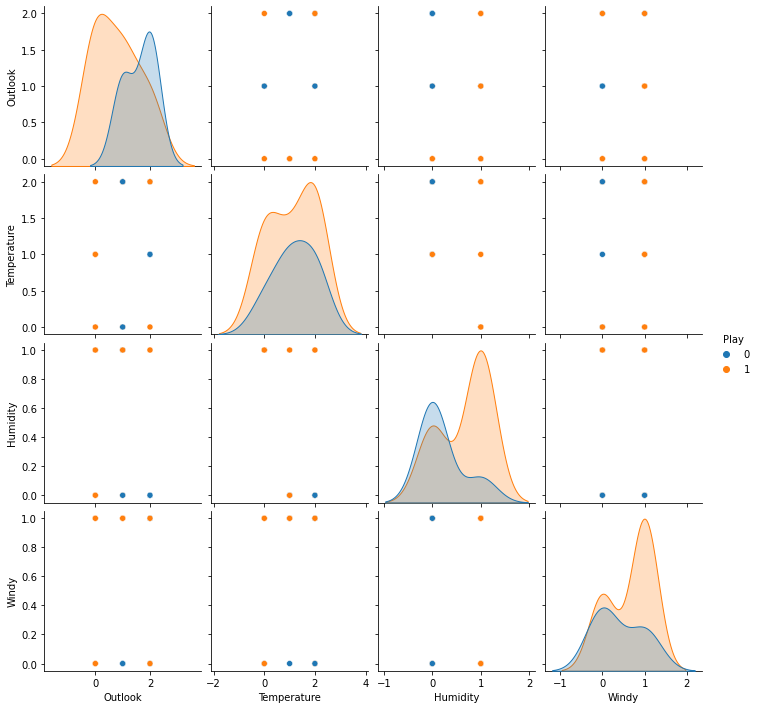

In [184]:
plt.figure(figsize = (10,12))
sns.pairplot(df,hue = 'Play')
plt.show()

<Figure size 720x864 with 0 Axes>

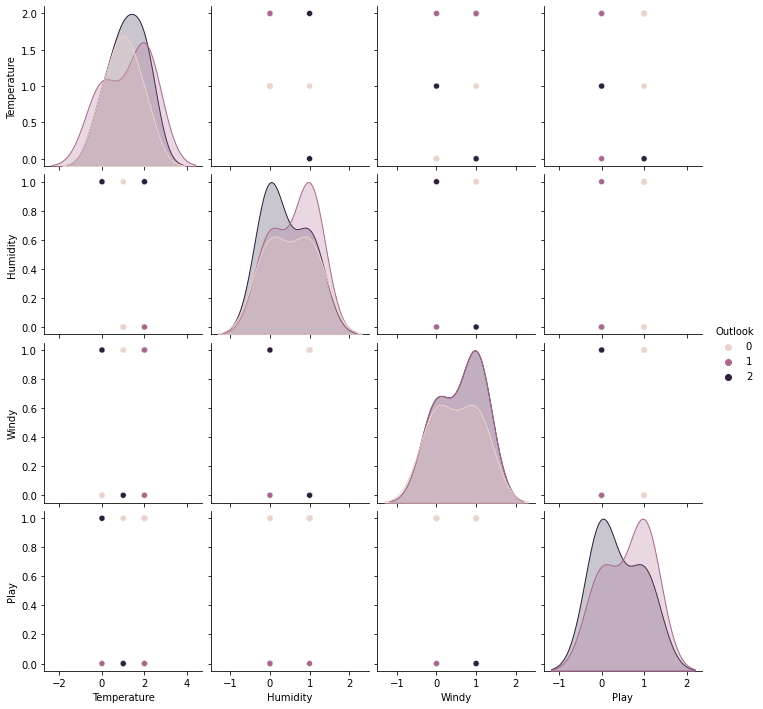

In [187]:
plt.figure(figsize = (10,12))
sns.pairplot(df,hue = 'Outlook')
plt.show()

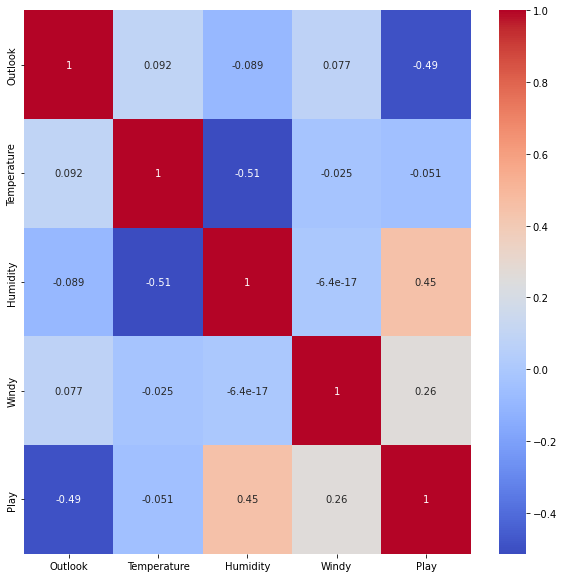

In [192]:
#plot correlation_matrix
plt.figure(figsize = (10,10))
correlation = df.corr()
sns.heatmap(correlation,annot = True,cmap = 'coolwarm')
plt.show()

In [214]:
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 39)


In [215]:
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 42)
classifier.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [216]:
y_predict = classifier.predict(X_test)

In [217]:
accuracy = accuracy_score(y_test,y_predict)
print(accuracy)

0.6666666666666666


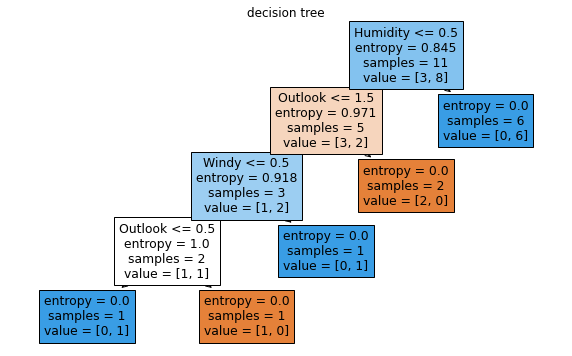

In [219]:
plt.figure(figsize=(10,6))
plot_tree(classifier,feature_names = X.columns,filled = True)
plt.title('decision tree')
plt.show()

In [234]:
# 8. unsupervised KMeans -> iris dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score

In [242]:
def Kmeans(X,k,max_iters = 100):
    centroids = X[:k]
    for i in range(K,len(X)):
        distances = np.linalg.norm(X[i] - centroids,axis = 1)
        nearest_centroids = np.argmin(distances)
        centroids[nearest_centroids] = (centroids[nearest_centroids] + X[i])/2
    labels = np.zeros(X.shape[0])
    
    for _ in range(max_iters):
        for i in range(len(X)):
            distances = np.linalg.norm(X[i] - centroids,axis = 1)
            nearest_centroids = np.argmin(distances)
            labels[i] = nearest_centroids
    return labels,centroids

In [243]:
iris = load_iris()
X = iris.data
y = iris.target



In [244]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

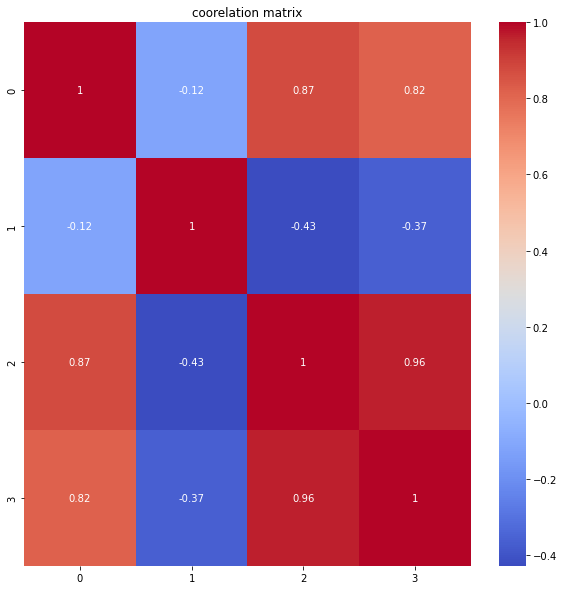

In [245]:
correlation_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm')
plt.title('coorelation matrix')
plt.show()

In [246]:
K = 3
labels,centroids = Kmeans(X_scaled,K)
print(labels)
print(centroids)

[0. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1.]
[[ 0.684312    0.39488866  0.9094604   1.36632955]
 [ 0.2127703  -0.5201684   0.75084178  0.83154966]
 [-1.18387052  0.57041411 -1.3304718  -1.24593938]]


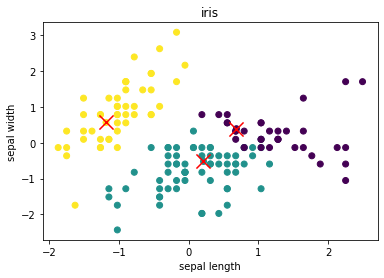

In [247]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c = labels)
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',color = 'red',s = 200)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('iris')
plt.show()

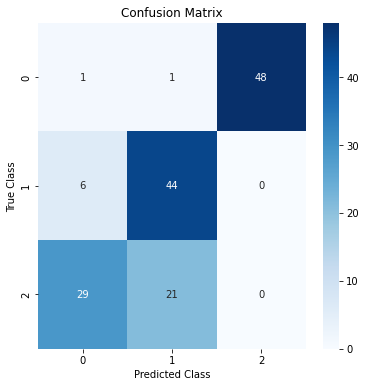

In [248]:
conf_matrix = confusion_matrix(y, labels)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [249]:
#9. Agglomerative Clusterng
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.datasets import load_iris


In [250]:
iris = load_iris()
data = iris.data[:6]

In [256]:
def proximity_matrix(data):
    n = data.shape[0]
    proximity_matrix = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            proximity_matrix[i,j] = np.linalg.norm(data[i] - data[j])
            proximity_matrix[j,i] = proximity_matrix[i,j]
    return proximity_matrix

In [257]:
def plot_dendrogram(data,method):
    linkage_matrix = linkage(data,method = method)
    dendrogram(linkage_matrix)
    print(f'dendrogram {method} linkage')
    plt.xlabel('data points')
    plt.ylabel('distance')
    plt.title(f'dendrogram {method} linkage')
    plt.show()

proximity matrix
[[0.         0.53851648 0.50990195 0.64807407 0.14142136 0.6164414 ]
 [0.53851648 0.         0.3        0.33166248 0.60827625 1.09087121]
 [0.50990195 0.3        0.         0.24494897 0.50990195 1.08627805]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407 1.16619038]
 [0.14142136 0.60827625 0.50990195 0.64807407 0.         0.6164414 ]
 [0.6164414  1.09087121 1.08627805 1.16619038 0.6164414  0.        ]]
dendrogram single linkage


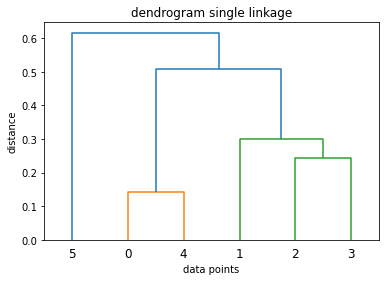

dendrogram complete linkage


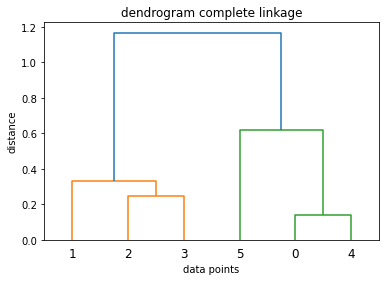

dendrogram average linkage


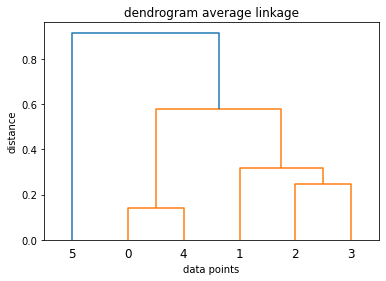

In [261]:
print('proximity matrix')
print(proximity_matrix(data))
plot_dendrogram(data,'single')
plot_dendrogram(data,'complete')
plot_dendrogram(data,'average')


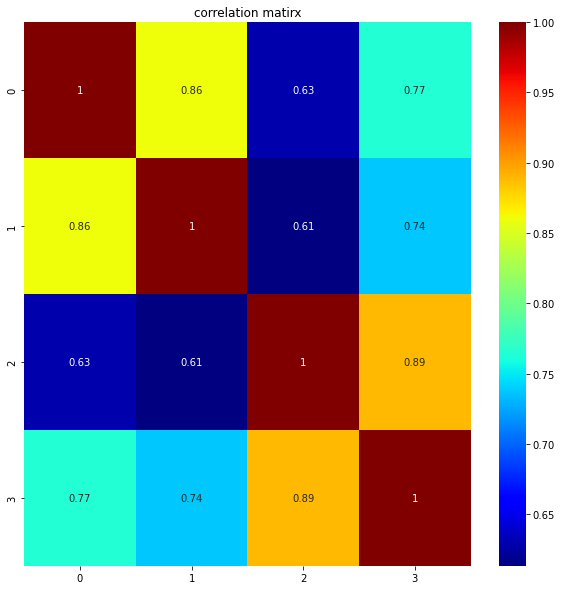

In [260]:
correlation_matrix = np.corrcoef(data.T)
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix,annot = True,cmap = 'jet')
plt.title('correlation matirx')
plt.show()

In [262]:
#lda and pca
#pca
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler

In [263]:
#load iris
X = load_iris().data
y = load_iris().target


In [264]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

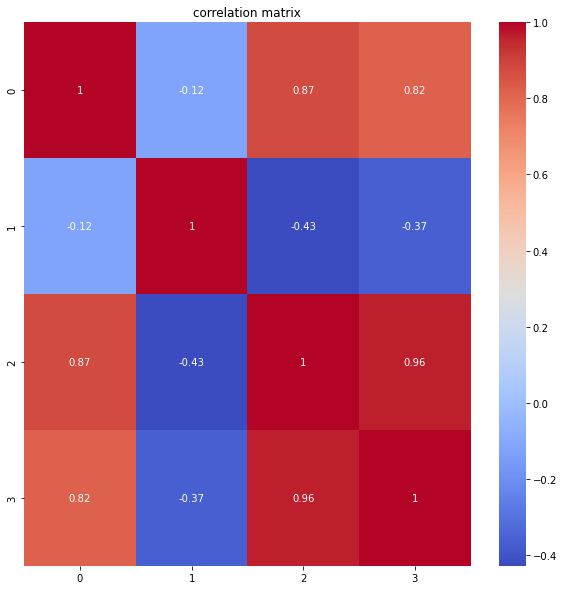

In [266]:
correlation_matrix = np.corrcoef(X_scaled.T)
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm')
plt.title('correlation matrix')
plt.show()


In [276]:
#perform pca 
pca = sklearnPCA(2)
X_projected = pca.fit_transform(X_scaled)

In [277]:
print("shape of Data ",X.shape)
print("Shape of transformed data ",X_projected.shape)


shape of Data  (150, 4)
Shape of transformed data  (150, 2)


In [269]:
pc1 = X_projected[:,0]
pc2 = X_projected[:,1]

Text(0, 0.5, 'PC2')

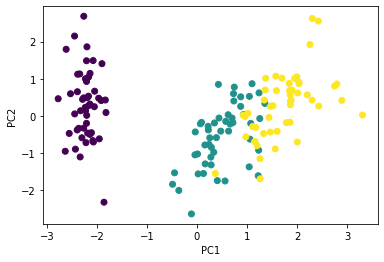

In [272]:
plt.scatter(pc1,pc2,c = y,cmap = 'viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")

In [278]:
#LDA 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [279]:
#load_iris
X = load_iris().data
y = load_iris().target


In [280]:
#perform data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


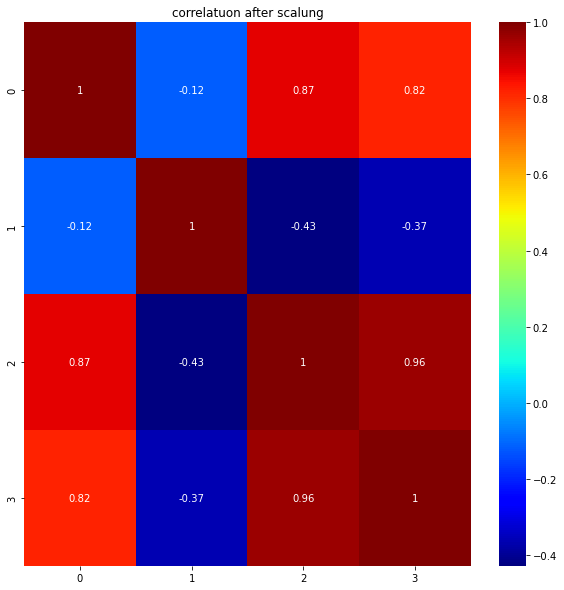

In [281]:
#correlation matrix
plt.figure(figsize = (10,10))
correlation = np.corrcoef(X_scaled.T)
sns.heatmap(correlation,annot = True,cmap = 'jet')
plt.title('correlatuon after scalung')
plt.show()


In [282]:
#perform Lda
lda = LinearDiscriminantAnalysis(n_components = 2)
X_projected = lda.fit_transform(X_scaled,y)

In [283]:
print("shape of data ",X.shape)
print("shape of transfiormed data",X_projected.shape)


shape of data  (150, 4)
shape of transfiormed data (150, 2)


In [284]:
lda1 = X_projected[:,0]
lda2 = X_projected[:,1]

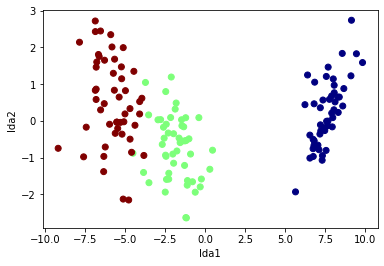

In [286]:
plt.scatter(lda1,lda2,c= y,cmap = 'jet')
plt.xlabel("lda1")
plt.ylabel("lda2")
plt.show()


In [288]:
#11 -> single layer perceptron

In [317]:
#single layer perceptron
import numpy as np

def step_function(x):
    return np.where(x >= 0,1,0)

X_and = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([[0],[0],[0],[1]])

X_or = np.array([[0,0],[0,1],[1,0],[1,1]])
y_or = np.array([[0],[1],[1],[1]])

class Perceptron:
    def __init__(self,input_size,learning_rate = 0.1,epochs = 1000):
        self.weights = np.zeros((input_size,1))
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def train(self,X,y):
        for _ in range(self.epochs):
            for inputs,label in zip(X,y):
                inputs = inputs.reshape(-1,1)
                linear_output = np.dot(inputs.T,self.weights) + self.bias
                prediction = step_function(linear_output)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
                
    def predict(self,X):
        linear_output = np.dot(X,self.weights) + self.bias
        return step_function(linear_output)
    
perceptron_and = Perceptron(input_size = 2)
perceptron_and.train(X_and, y_and)

perceptron_or = Perceptron(input_size = 2)
perceptron_or.train(X_or,y_or)

print("and func prediction")
print(perceptron_and.predict(X_and))

print("or func prediction")
print(perceptron_or.predict(X_or))

and_test_input = np.array([[1,1]])
print("and function prediction for ip [1,1]")
print(perceptron_and.predict(and_test_input))

or_test_input = np.array([[0,1]])
print("or function prediction for ip [0,1]")
print(perceptron_or.predict(or_test_input))



    

and func prediction
[[0]
 [0]
 [0]
 [1]]
or func prediction
[[0]
 [1]
 [1]
 [1]]
and function prediction for ip [1,1]
[[1]]
or function prediction for ip [0,1]
[[1]]


In [315]:
#12 mlp -> SKLearn
import numpy as np
from sklearn.neural_network import MLPClassifier

In [299]:
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([[0],[1],[1],[0]])


In [300]:
X_and_not = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and_not = np.array([[0],[0],[1],[0]])


In [301]:
MLP_xor = MLPClassifier(activation = 'logistic',hidden_layer_sizes = (4),solver = 'lbfgs')
MLP_xor.fit(X_xor,y_xor)
MLP_xor.predict(X_xor)

C:\Users\458\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 1, 0])

In [302]:
MLP_and_not = MLPClassifier(activation = 'logistic',hidden_layer_sizes = (4),solver = 'lbfgs')
MLP_and_not.fit(X_and_not,y_and_not)
MLP_and_not.predict(X_and_not)

C:\Users\458\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 1, 0])

In [318]:
X_and = np.array([[0,0],[0,1],[1,0],[1,1]])
y_and = np.array([[0],[0],[0],[1]])



In [319]:
X_or = np.array([[0,0],[0,1],[1,0],[1,1]])
y_or = np.array([[0],[1],[1],[1]])

In [320]:
MLP_xor = MLPClassifier(activation = 'logistic',hidden_layer_sizes = (4),solver = 'lbfgs')
MLP_xor.fit(X_and,y_and)
MLP_xor.predict(X_and)

C:\Users\458\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, 1])

In [321]:
MLP_xor = MLPClassifier(activation = 'logistic',hidden_layer_sizes = (4),solver = 'lbfgs')
MLP_xor.fit(X_or,y_or)
MLP_xor.predict(X_or)

C:\Users\458\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 1, 1])